In [2]:
!pip install livelossplot

In [3]:
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.8.0


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
train_images=pd.read_csv('/content/gdrive/MyDrive/set/dataset/train/images.csv',header=None)
train_labels=pd.read_csv('/content/gdrive/MyDrive/set/dataset/train/labels.csv',header=None)
val_images=pd.read_csv('/content/gdrive/MyDrive/set/dataset/validation/images.csv',header=None)
val_labels=pd.read_csv('/content/gdrive/MyDrive/set/dataset/validation/labels.csv',header=None)

In [7]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [8]:
print(train_images.shape, train_labels.shape)
print(val_images.shape, val_labels.shape)

(3200, 8192) (3200, 4)
(800, 8192) (800, 4)


In [9]:
x_train=train_images.values.reshape(3200,64,128,1)
x_val=val_images.values.reshape(800,64,128,1)

y_train=train_labels.values
y_val=val_labels.values


## Task 3: Plot 2D Spectrograms

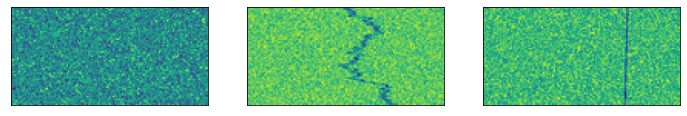

In [15]:
plt.figure(0,figsize=(12,12))
for i in range(1,4):
  plt.subplot(1,3,i)
  img=np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)

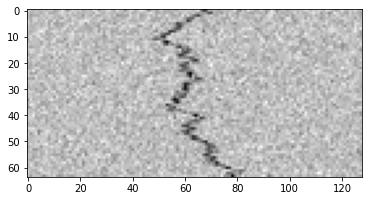

In [16]:
plt.imshow(np.squeeze(x_train[3]),cmap='gray')

## Task 4: Create Training and Validation Data Generators

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train=ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)
datagen_val=ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)


## Task 5: Creating the CNN Model

In [19]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:
# Initialising the CNN
model=Sequential()
# 1st Convolution
model.add(Conv2D(32,(5,5),padding='same',input_shape=(64,128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 2nd Convolution layer
model.add(Conv2D(64,(5,5),padding='same' ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4,activation='softmax'))


## Task 6: Learning Rate Scheduling and Compile the Model

In [21]:
initial_learning_rate=0.005
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True



)
optimizer=Adam(learning_rate=lr_schedule)


In [22]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 64, 128, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 64, 64)        5

## Task 7: Training the Model

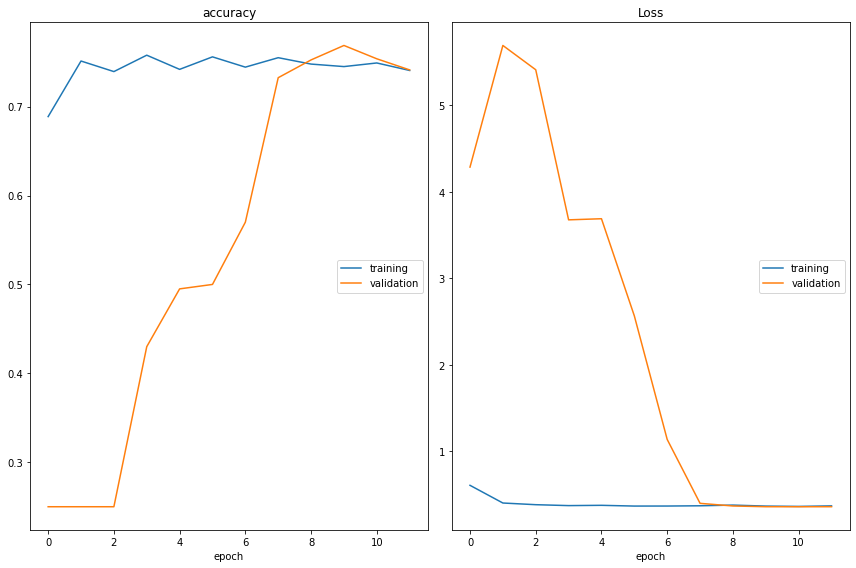

accuracy
	training         	 (min:    0.689, max:    0.758, cur:    0.741)
	validation       	 (min:    0.250, max:    0.769, cur:    0.741)
Loss
	training         	 (min:    0.364, max:    0.608, cur:    0.370)
	validation       	 (min:    0.360, max:    5.693, cur:    0.360)
100/100 [==============================] - 5s 55ms/step - loss: 0.3699 - accuracy: 0.7406 - val_loss: 0.3604 - val_accuracy: 0.7412


In [26]:
checkpoint=ModelCheckpoint('model_weight.h5',monitor= 'val_loss',
                           save_weights_only=True,model='min',
                           verbose=0 
                           
                           )
callbacks=[PlotLossesCallback(),checkpoint]
batch_size=32
history=model.fit(
    datagen_train.flow(x_train,y_train,batch_size=batch_size,shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data=datagen_val.flow(x_val,y_val,batch_size=batch_size,shuffle=True),
                                     validation_steps=len(x_val)//batch_size,
                                     epochs=12,
                                     callbacks=callbacks)




## Task 8: Model Evaluation

In [27]:
model.evaluate(x_val,y_val)

25/25 [==============================] - 1s 19ms/step - loss: 0.3601 - accuracy: 0.7563


[0.36007463932037354, 0.7562500238418579]

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true= np.argmax(y_val,1)
y_pred=np.argmax(model.predict(x_val),1)
print(metrics.classification_report(y_true,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.52      0.42      0.46       200
           2       0.51      0.61      0.56       200
           3       1.00      1.00      1.00       200

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.75       800
weighted avg       0.76      0.76      0.75       800



In [30]:
print("Classification accuracy: % 0.6f" % metrics.accuracy_score(y_true,y_pred))

Classification accuracy:  0.756250


In [31]:
  labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
